## 1. Problem Definition
> Consider the predictive modeling problem, where you want to predict whether a candidate donor will make a donation in the next year. To build the model, you use historical data and calculate the target in 2017. The target is 1 if a donation is made in 2017 and 0 otherwise

## 2. Data

**Features**
1. target: our label which indicates whether a donation was made or not
2. gender_f: gender of our donor. 1= female, 0 = male
3. income_high: does our donor belongs to high income 
4. income_low: does our donor belongs to low income 
5. country_USA: does our donor belongs from US 
6. country_India: does our donor belongs from India 
7. country_UK: does our donor belongs from UK
8. age: age of our donor
9. time_since_last_gift: time in days since last donation
10. time_since_first_gift: time in days since first donation
11. max_gift: maximum donated amount 
12. min_gift: minimum donated amout 
13. mean_gift: Average donated amount
14. number_gift: Number of donations


## 3. Evaluation

The evaluation metric that we are using is AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. 

### Preparing the tools

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
sns.set()

### Exploring our dataset

In [3]:
basetable = pd.read_csv('basetable_ex2_4.csv')
basetable.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1


In [9]:
basetable.target.value_counts()

0    23813
1     1187
Name: target, dtype: int64

In [16]:
# Print the target incidence percentage.
basetable.target.value_counts(normalize=True) * 100

0    95.252
1     4.748
Name: target, dtype: float64

> Around 5% of the people made a donation in year 2017 

In [17]:
basetable.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [18]:
basetable.describe()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.00000
mean,0.047480,0.50316,0.164320,0.208200,0.402920,0.495160,0.101920,53.605080,757.845560,2152.18212,111.167640,69.830680,90.455932,5.22572
std,0.212667,0.50000,0.370573,0.406029,0.490495,0.499987,0.302549,17.382771,342.286498,658.40422,20.377627,20.085216,15.466240,2.83908
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,32.000000,32.00000,18.000000,2.000000,18.000000,1.00000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,519.000000,1915.00000,99.000000,56.000000,80.666667,3.00000
50%,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,736.000000,2414.00000,112.000000,69.000000,90.571429,5.00000
75%,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,64.000000,985.000000,2633.00000,125.000000,82.000000,100.444444,7.00000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,109.000000,2305.000000,2771.00000,194.000000,194.000000,194.000000,18.00000


#### Statistical Analysis

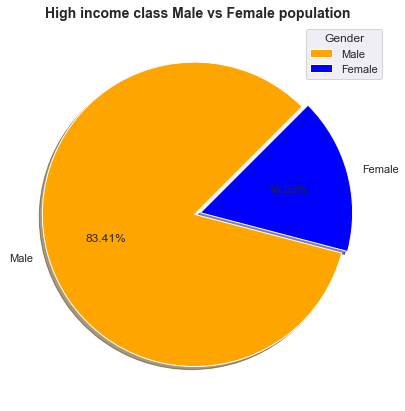

In [74]:
us = basetable.groupby('income_high', as_index=False)['gender_F'].sum()
total = us["gender_F"].values.sum()
fig = plt.figure(figsize =(8, 7))
plt.pie(us["gender_F"], labels = ["Male","Female"], explode = [0.02,0.02], startangle = 45, shadow = True, colors = ["orange","blue"],autopct=lambda p: '{:.2f}%'.format(p))
plt.legend(title ="Gender")
plt.title("High income class Male vs Female population",{'fontsize': 14,
 'fontweight' : "bold"})
plt.show()

> In our dataset, male population falls **83%** in the high income class as compared to female population which only has roughly **17%**.

**Male vs Female population**

In [75]:
female = sum(basetable['gender_F'] == 1)
male = sum(basetable['gender_F'] == 0)

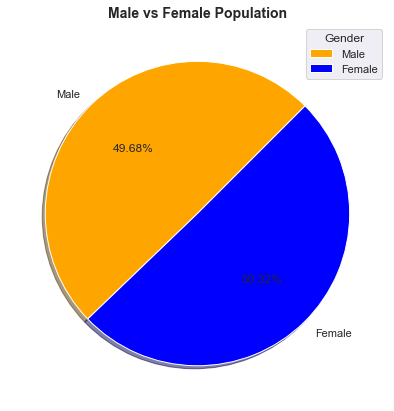

In [76]:
fig = plt.figure(figsize =(8, 7))
plt.pie([male,female], labels = ["Male","Female"], startangle = 45, shadow = True, colors = ["orange","blue"],autopct=lambda p: '{:.2f}%'.format(p))
plt.legend(title ="Gender")
plt.title("Male vs Female Population",{'fontsize': 14,
 'fontweight' : "bold"})
plt.show()

### Model

In [18]:
# Import linear_model from sklearn.
logreg = LogisticRegression()

In [21]:
# Create a dataframe X that only contains the candidate predictors age, gender_F and time_since_last_gift.
X = basetable[['age', 'gender_F', 'time_since_last_gift']]
# Create a dataframe y that contains the target
y =basetable['target']
# Create a logistic regression model logreg and fit it to the data.
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [22]:
predictors = ["age","gender_F","time_since_last_gift"]

In [23]:
basetable_predict = basetable[predictors]
prediction= logreg.predict_proba(basetable_predict)
print(prediction[0:5])

[[0.93439418 0.06560582]
 [0.94519285 0.05480715]
 [0.92097941 0.07902059]
 [0.95296422 0.04703578]
 [0.94672824 0.05327176]]


#### Calculating AUC

In [25]:
# Make predictions
prediction_X = logreg.predict_proba(X)
prediction_X_target = prediction_X[:,1]

# Calculate the AUC value
auc = roc_auc_score(y, prediction_X_target)
print(round(auc,2))

0.63


### Stepwise variable selection
+ To get the features on which our model performs best

In [78]:
# function to calculate auc score
def auc_score(variable, target, df):
    X = df[variable]
    y = df[target]
    
    logreg = LogisticRegression()
    logreg.fit(X,y)
    predict = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predict)
    return (auc)

In [79]:
#defining a functiong that loop the candidate variable to find out next variable combination

def next_best_variable(current_varibales, candidate_variables, target, df):
    best_auc = -1
    best_variable = None
    
    for v in candidate_variables:
        auc_v = auc_score(current_varibales + [v], target, df)
        
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable =v 
    return best_variable  

In [80]:
#Create the candidates variable 
candidate_variable = list(basetable.columns.values)
print(candidate_variable)

['target', 'gender_F', 'income_high', 'income_low', 'country_USA', 'country_India', 'country_UK', 'age', 'time_since_last_gift', 'time_since_first_gift', 'max_gift', 'min_gift', 'mean_gift', 'number_gift']


In [81]:
candidate_variable.remove('target')

In [82]:
# Initialize the current variables
current_variable =[]


In [83]:
# Selecting 6 features which provides the highest auc score
number_of_iteration = 6

for i in range (0, number_of_iteration):
    
    next_variable = next_best_variable(current_variable, candidate_variable, 'target', basetable)
    current_variable = current_variable + [next_variable]
    candidate_variable.remove(next_variable)
    
    print('Variable added in step '+str(i+1)+ ' is '+next_variable)
print(current_variable)

Variable added in step 1 is max_gift
Variable added in step 2 is number_gift
Variable added in step 3 is time_since_last_gift
Variable added in step 4 is mean_gift


D:\machine_learning_project_folder\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Variable added in step 5 is age


D:\machine_learning_project_folder\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\machine_learning_project_folder\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Variable added in step 6 is gender_F
['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'age', 'gender_F']


D:\machine_learning_project_folder\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
current_list_auc = auc_score(current_variable, 'target', basetable)
print(current_list_auc)

0.7692565680692843


D:\machine_learning_project_folder\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Creating training and test sets

In [86]:
X_basetable = basetable.drop('target', 1)
y_basetable = basetable['target']

In [88]:
# Carry out 50-50 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X_basetable, y_basetable, test_size=0.25)


In [89]:
# Create the final train and test basetables
train = pd.concat([X_train, y_train], 1)
test  = pd.concat([X_test, y_test], 1) 

In [90]:
def auc_train_test(var, target, df_train, df_test):
    logreg = LogisticRegression()
    train_X = df_train[var]
    train_y = df_train[target]
    
    test_X  = df_test[var]
    test_y  = df_test[target]
    
    logreg.fit(train_X, train_y)
    predict_train = logreg.predict_proba(train_X)[:,1]
    auc_train = roc_auc_score(train_y, predict_train)
      
    logreg.fit(test_X, test_y)
    predict_test = logreg.predict_proba(test_X)[:,1]
    auc_test = roc_auc_score(test_y, predict_test)
    return (auc_train, auc_test)

In [94]:
# Apply the auc_train_test function
auc_train, auc_test = auc_train_test(current_variable, 'target', train, test)
print(round(auc_train,3))

0.773


D:\machine_learning_project_folder\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
